# HR Analytics - Employee Attrition Prediction with MLP

This notebook analyzes the HR Analytics dataset and trains a Multi-Layer Perceptron (MLP) model to predict employee attrition.

## 1. Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score
)
import joblib
import os
import warnings
import shap
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


/home/abzy/dev/aitu/masters/trimester1/aitu-programming-for-ai/project/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Load and Explore Data


In [2]:
# Load the dataset
try:
    df = pd.read_csv('data/HR_Analytics.csv')
except FileNotFoundError:
    print("Error: The file 'data/HR_Analytics.csv' does not exist. Please download the dataset from the provided link.")
    df = pd.DataFrame()

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()


Dataset Shape: (1480, 38)

First few rows:


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [3]:
# Dataset information
print("Dataset Info:")
print("="*50)
df.info()
print("\n" + "="*50)
print("\nMissing Values:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print("\n" + "="*50)
print("\nBasic Statistics:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Attrition Distribution:
Attrition
No     1242
Yes     238
Name: count, dtype: int64

Attrition Percentage:
Attrition
No     83.918919
Yes    16.081081
Name: proportion, dtype: float64


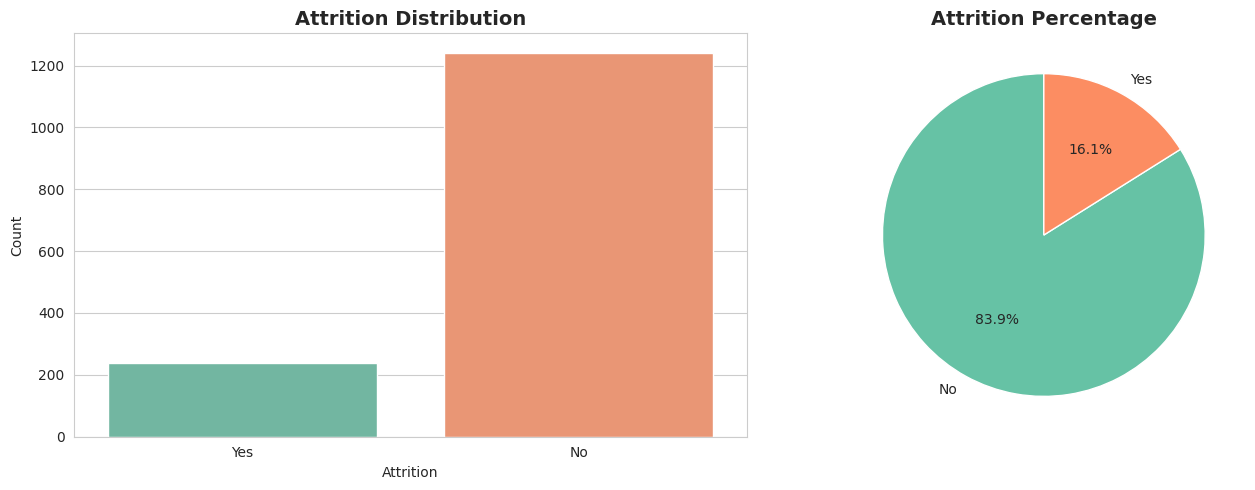

In [4]:
# Check target variable distribution
print("Attrition Distribution:")
print(df['Attrition'].value_counts())
print("\nAttrition Percentage:")
print(df['Attrition'].value_counts(normalize=True) * 100)

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Attrition', ax=axes[0], palette='Set2')
axes[0].set_title('Attrition Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')

# Pie chart
attrition_counts = df['Attrition'].value_counts()
axes[1].pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette('Set2'))
axes[1].set_title('Attrition Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


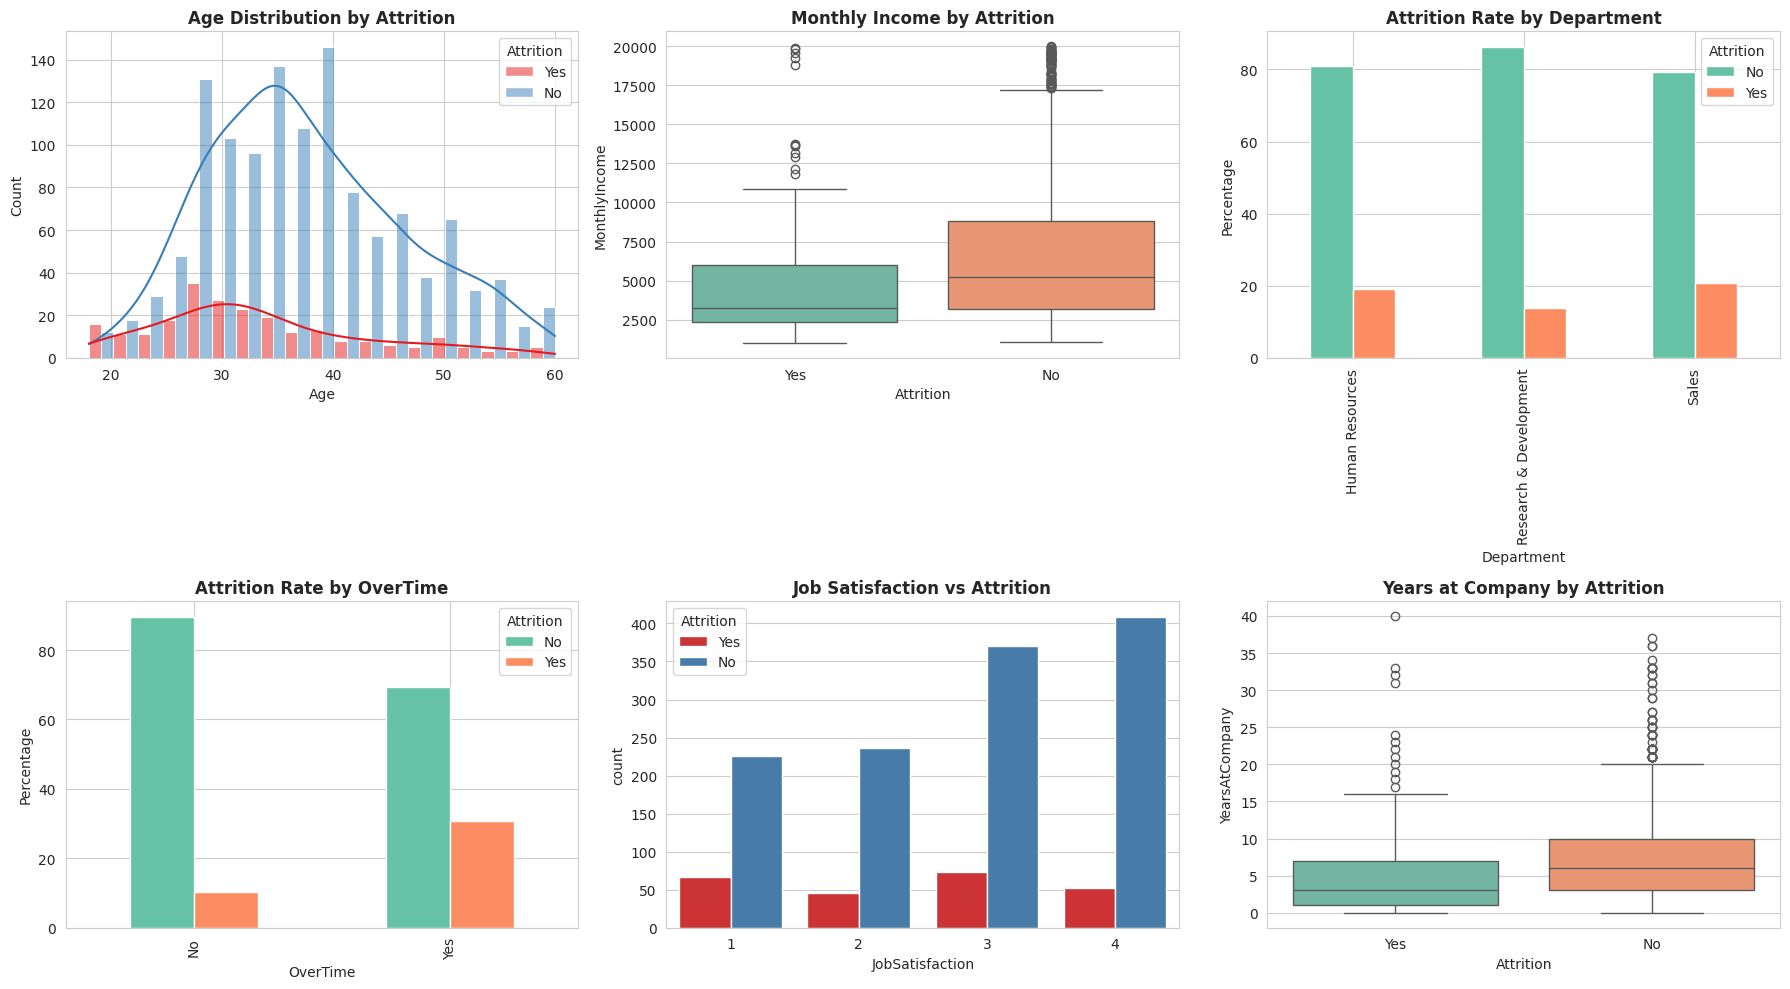

In [5]:
# Visualize key features relationship with attrition
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Age distribution by Attrition
sns.histplot(data=df, x='Age', hue='Attrition', multiple='dodge', kde=True, ax=axes[0, 0], palette='Set1')
axes[0, 0].set_title('Age Distribution by Attrition', fontweight='bold')

# Monthly Income by Attrition
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Monthly Income by Attrition', fontweight='bold')

# Department vs Attrition
dept_attrition = pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100
dept_attrition.plot(kind='bar', ax=axes[0, 2], color=['#66c2a5', '#fc8d62'])
axes[0, 2].set_title('Attrition Rate by Department', fontweight='bold')
axes[0, 2].set_ylabel('Percentage')
axes[0, 2].set_xlabel('Department')
axes[0, 2].legend(title='Attrition')

# OverTime vs Attrition
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
overtime_attrition.plot(kind='bar', ax=axes[1, 0], color=['#66c2a5', '#fc8d62'])
axes[1, 0].set_title('Attrition Rate by OverTime', fontweight='bold')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].set_xlabel('OverTime')
axes[1, 0].legend(title='Attrition')

# Job Satisfaction by Attrition
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', ax=axes[1, 1], palette='Set1')
axes[1, 1].set_title('Job Satisfaction vs Attrition', fontweight='bold')

# Years at Company by Attrition
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany', ax=axes[1, 2], palette='Set2')
axes[1, 2].set_title('Years at Company by Attrition', fontweight='bold')

plt.tight_layout()
plt.show()


## 3. Data Preprocessing


In [6]:
# Create a copy for preprocessing
df_processed = df.copy()

# Drop irrelevant columns
columns_to_drop = ['EmpID', 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df_processed = df_processed.drop(columns=columns_to_drop, errors='ignore')

print(f"Columns after dropping irrelevant features: {df_processed.shape[1]}")
print("\nRemaining columns:")
print(df_processed.columns.tolist())


Columns after dropping irrelevant features: 33

Remaining columns:
['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [7]:
# Encode categorical variables
label_encoders = {}
categorical_columns = df_processed.select_dtypes(include=['object']).columns.tolist()

print(f"Categorical columns to encode: {len(categorical_columns)}")
print(categorical_columns)

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nEncoding completed!")


Categorical columns to encode: 10
['AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab', 'OverTime']
Encoded AgeGroup: {'18-25': np.int64(0), '26-35': np.int64(1), '36-45': np.int64(2), '46-55': np.int64(3), '55+': np.int64(4)}
Encoded Attrition: {'No': np.int64(0), 'Yes': np.int64(1)}
Encoded BusinessTravel: {'Non-Travel': np.int64(0), 'TravelRarely': np.int64(1), 'Travel_Frequently': np.int64(2), 'Travel_Rarely': np.int64(3)}
Encoded Department: {'Human Resources': np.int64(0), 'Research & Development': np.int64(1), 'Sales': np.int64(2)}
Encoded EducationField: {'Human Resources': np.int64(0), 'Life Sciences': np.int64(1), 'Marketing': np.int64(2), 'Medical': np.int64(3), 'Other': np.int64(4), 'Technical Degree': np.int64(5)}
Encoded Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Encoded JobRole: {'Healthcare Representative': np.int64(0), 'Human Resources': np.int64(1), 'Laboratory Technician': np.int64(2)

In [8]:
# Check for missing values after encoding
print("Missing Values After Encoding:")
print("="*50)
missing_values = df_processed.isnull().sum()
missing_values_filtered = missing_values[missing_values > 0].sort_values(ascending=False)

if len(missing_values_filtered) > 0:
    print(missing_values_filtered)
    print(f"\nTotal missing values: {df_processed.isnull().sum().sum()}")
    print(f"Percentage of data with missing values: {(df_processed.isnull().sum().sum() / df_processed.size) * 100:.2f}%")
else:
    print("No missing values found!")


Missing Values After Encoding:
YearsWithCurrManager    57
dtype: int64

Total missing values: 57
Percentage of data with missing values: 0.12%


In [9]:
# Handle missing values
# Separate numerical columns for imputation
numerical_columns = df_processed.select_dtypes(include=[np.number]).columns.tolist()

print("Handling Missing Values...")
print("="*50)

# For numerical columns, we'll use median imputation (more robust to outliers than mean)
imputer = SimpleImputer(strategy='median')

# Check if there are any missing values to impute
if df_processed.isnull().sum().sum() > 0:
    df_processed[numerical_columns] = imputer.fit_transform(df_processed[numerical_columns])
    print(f"✓ Imputed missing values using median strategy")
    print(f"✓ Columns imputed: {len(numerical_columns)}")
    
    # Verify no missing values remain
    remaining_missing = df_processed.isnull().sum().sum()
    print(f"\n✓ Remaining missing values: {remaining_missing}")
else:
    print("No missing values to handle!")

print("\nData preprocessing completed!")


Handling Missing Values...
✓ Imputed missing values using median strategy
✓ Columns imputed: 33

✓ Remaining missing values: 0

Data preprocessing completed!


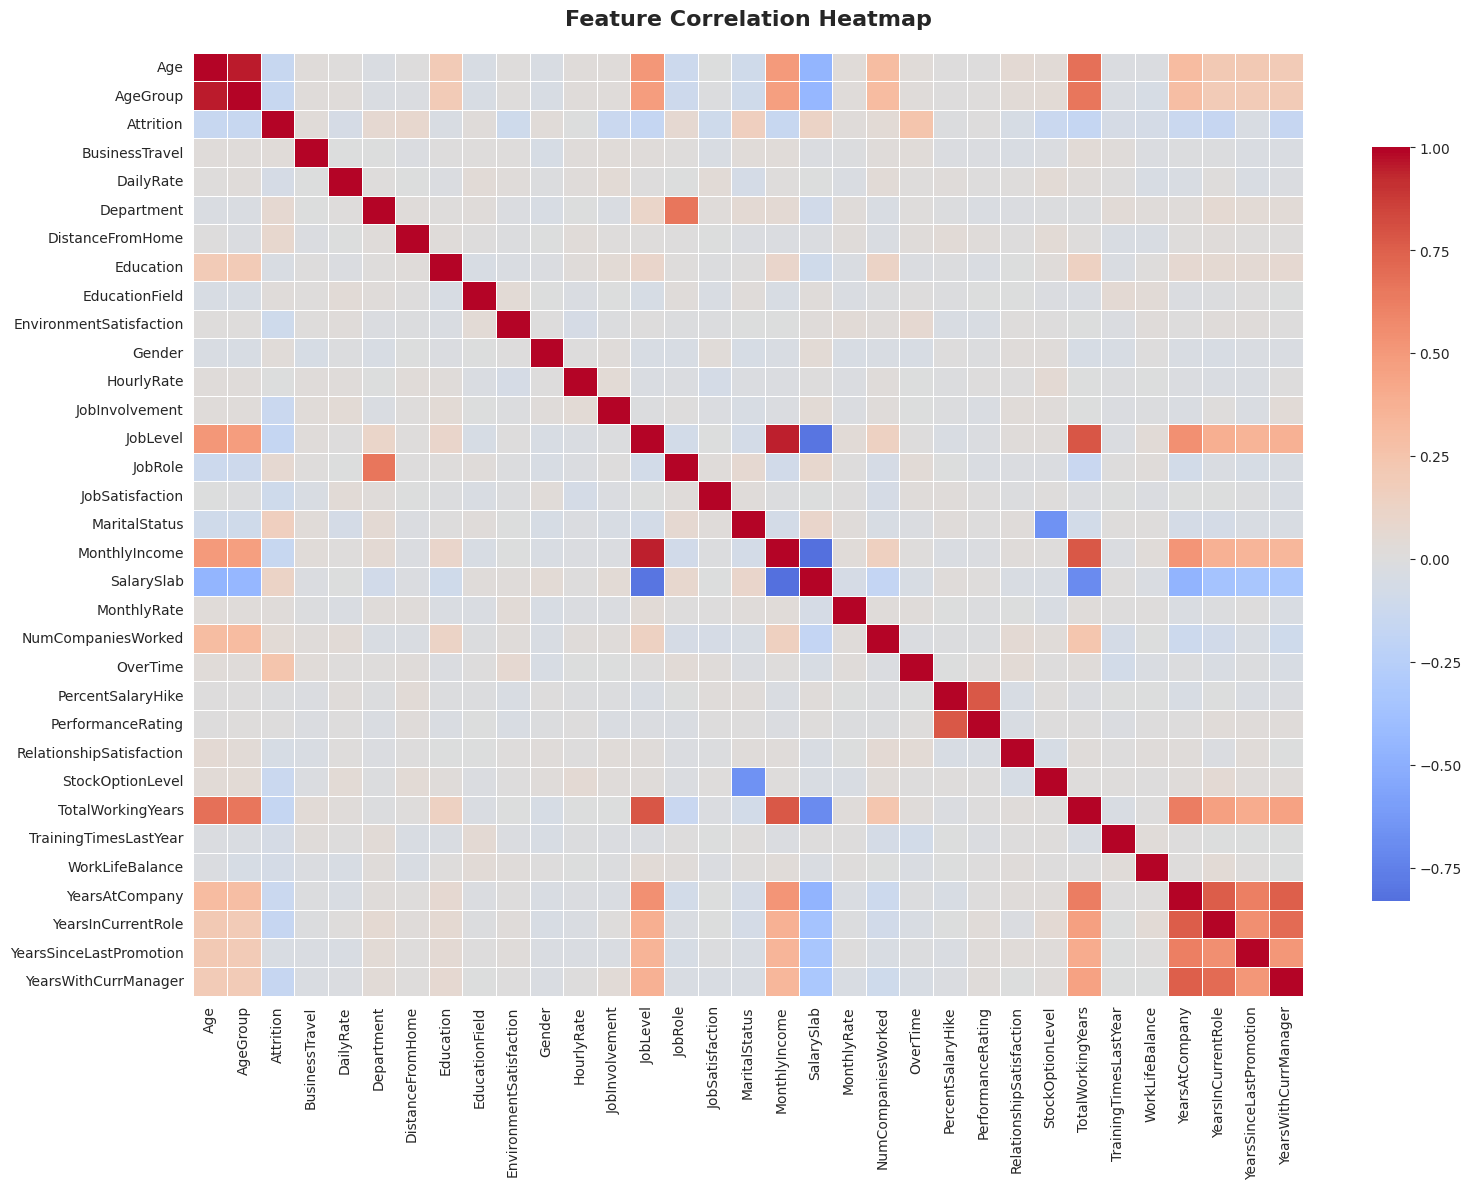


Top 15 Features Correlated with Attrition:
Attrition               1.000000
OverTime                0.248331
TotalWorkingYears       0.168358
JobLevel                0.167150
YearsInCurrentRole      0.160968
YearsWithCurrManager    0.159527
MaritalStatus           0.158124
MonthlyIncome           0.157672
Age                     0.155476
AgeGroup                0.145693
StockOptionLevel        0.135140
YearsAtCompany          0.135108
JobInvolvement          0.130769
SalarySlab              0.121327
JobSatisfaction         0.104232
Name: Attrition, dtype: float64


In [10]:
# Correlation analysis
plt.figure(figsize=(16, 12))
correlation_matrix = df_processed.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlations with Attrition
attrition_corr = correlation_matrix['Attrition'].abs().sort_values(ascending=False)
print("\nTop 15 Features Correlated with Attrition:")
print(attrition_corr.head(15))


In [11]:
# Prepare features and target
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())


Features shape: (1480, 32)
Target shape: (1480,)

Target distribution:
Attrition
0.0    1242
1.0     238
Name: count, dtype: int64

Training set size: 1184
Test set size: 296

Training set class distribution:
Attrition
0.0    994
1.0    190
Name: count, dtype: int64

Test set class distribution:
Attrition
0.0    248
1.0     48
Name: count, dtype: int64


In [12]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")


Feature scaling completed!
Scaled training data shape: (1184, 32)
Scaled test data shape: (296, 32)


## 4. Train MLP Model


In [13]:
# Create MLP Classifier
# Architecture: Input -> Hidden Layer 1 (100 neurons) -> Hidden Layer 2 (50 neurons) -> Hidden Layer 3 (25 neurons) -> Output
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50, 25),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    verbose=True,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)

print("MLP Architecture:")
print(f"Hidden layers: {mlp.hidden_layer_sizes}")
print(f"Activation function: {mlp.activation}")
print(f"Solver: {mlp.solver}")
print(f"Learning rate: {mlp.learning_rate}")
print(f"Max iterations: {mlp.max_iter}")
print("\nStarting training...")


MLP Architecture:
Hidden layers: (100, 50, 25)
Activation function: relu
Solver: adam
Learning rate: adaptive
Max iterations: 500

Starting training...


In [14]:
# Train the model
mlp.fit(X_train_scaled, y_train)

print("\n" + "="*50)
print("Training completed!")
print("="*50)
print(f"\nNumber of iterations: {mlp.n_iter_}")
print(f"Number of layers: {mlp.n_layers_}")
print(f"Number of outputs: {mlp.n_outputs_}")
print(f"Loss: {mlp.loss_:.6f}")


Iteration 1, loss = 0.47067325
Validation score: 0.840336
Iteration 2, loss = 0.43349905
Validation score: 0.840336
Iteration 3, loss = 0.41334581
Validation score: 0.840336
Iteration 4, loss = 0.39575697
Validation score: 0.840336
Iteration 5, loss = 0.37792387
Validation score: 0.840336
Iteration 6, loss = 0.36209926
Validation score: 0.840336
Iteration 7, loss = 0.34683760
Validation score: 0.840336
Iteration 8, loss = 0.33162802
Validation score: 0.848739
Iteration 9, loss = 0.31820723
Validation score: 0.848739
Iteration 10, loss = 0.30564160
Validation score: 0.848739
Iteration 11, loss = 0.29293798
Validation score: 0.857143
Iteration 12, loss = 0.28258444
Validation score: 0.848739
Iteration 13, loss = 0.27099168
Validation score: 0.848739
Iteration 14, loss = 0.26015902
Validation score: 0.865546
Iteration 15, loss = 0.24970609
Validation score: 0.865546
Iteration 16, loss = 0.23956700
Validation score: 0.857143
Iteration 17, loss = 0.22838080
Validation score: 0.865546
Iterat

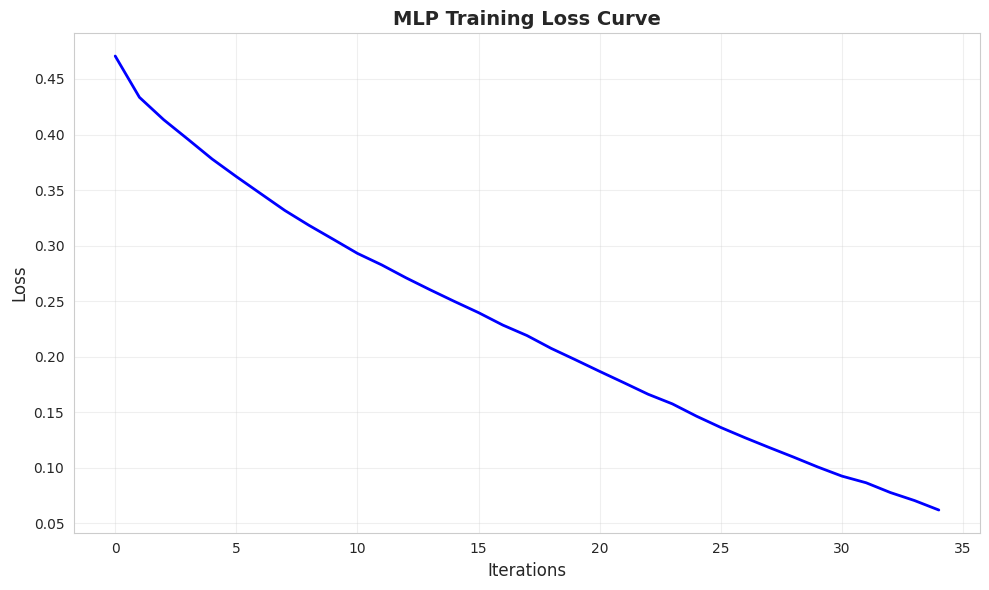

Final training loss: 0.061814


In [15]:
# Visualize training loss
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_, linewidth=2, color='blue')
plt.title('MLP Training Loss Curve', fontsize=14, fontweight='bold')
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training loss: {mlp.loss_curve_[-1]:.6f}")


## 5. Model Evaluation


In [16]:
# Make predictions
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

# Get prediction probabilities for ROC curve
y_train_pred_proba = mlp.predict_proba(X_train_scaled)[:, 1]
y_test_pred_proba = mlp.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"\nTraining F1-Score: {train_f1:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print("\n" + "="*50)


MODEL PERFORMANCE METRICS

Training Accuracy: 0.9476
Test Accuracy: 0.8581

Training F1-Score: 0.8218
Test F1-Score: 0.4615



In [17]:
# Classification Report
print("\nCLASSIFICATION REPORT - TEST SET")
print("="*50)
print(classification_report(y_test, y_test_pred, 
                          target_names=['No Attrition', 'Attrition']))



CLASSIFICATION REPORT - TEST SET
              precision    recall  f1-score   support

No Attrition       0.89      0.95      0.92       248
   Attrition       0.60      0.38      0.46        48

    accuracy                           0.86       296
   macro avg       0.74      0.66      0.69       296
weighted avg       0.84      0.86      0.84       296



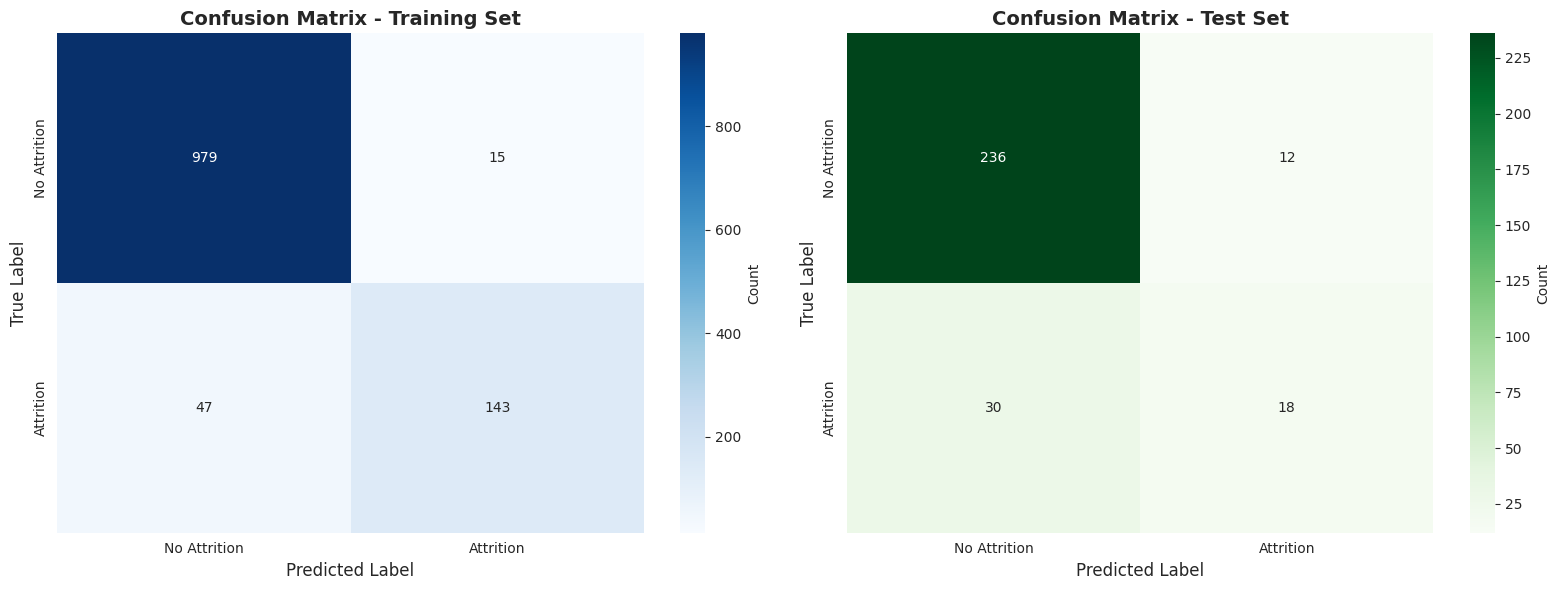

In [18]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - Training Set', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Test set confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'],
            cbar_kws={'label': 'Count'})
axes[1].set_title('Confusion Matrix - Test Set', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()


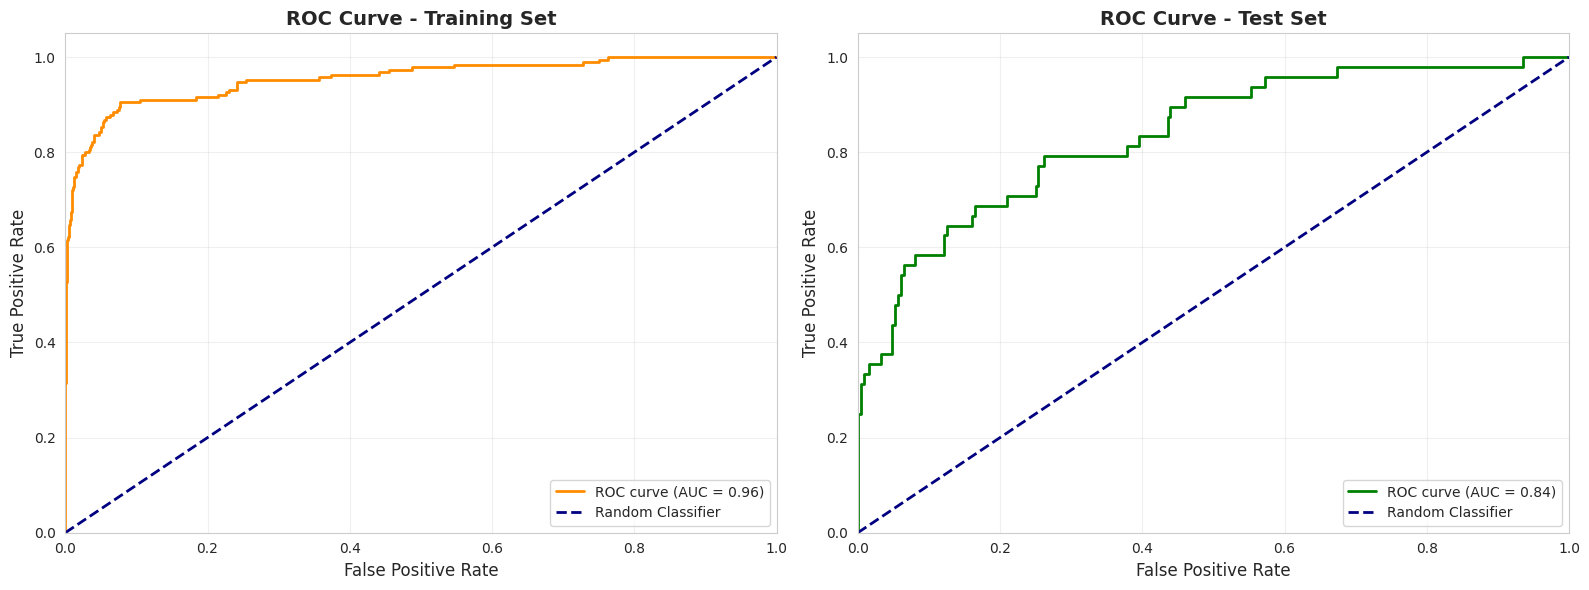


Training AUC-ROC Score: 0.9558
Test AUC-ROC Score: 0.8366


In [19]:
# ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)

axes[0].plot(fpr_train, tpr_train, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc_train:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate', fontsize=12)
axes[0].set_ylabel('True Positive Rate', fontsize=12)
axes[0].set_title('ROC Curve - Training Set', fontsize=14, fontweight='bold')
axes[0].legend(loc="lower right")
axes[0].grid(True, alpha=0.3)

# Test ROC curve
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

axes[1].plot(fpr_test, tpr_test, color='green', lw=2, 
             label=f'ROC curve (AUC = {roc_auc_test:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ROC Curve - Test Set', fontsize=14, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTraining AUC-ROC Score: {roc_auc_train:.4f}")
print(f"Test AUC-ROC Score: {roc_auc_test:.4f}")


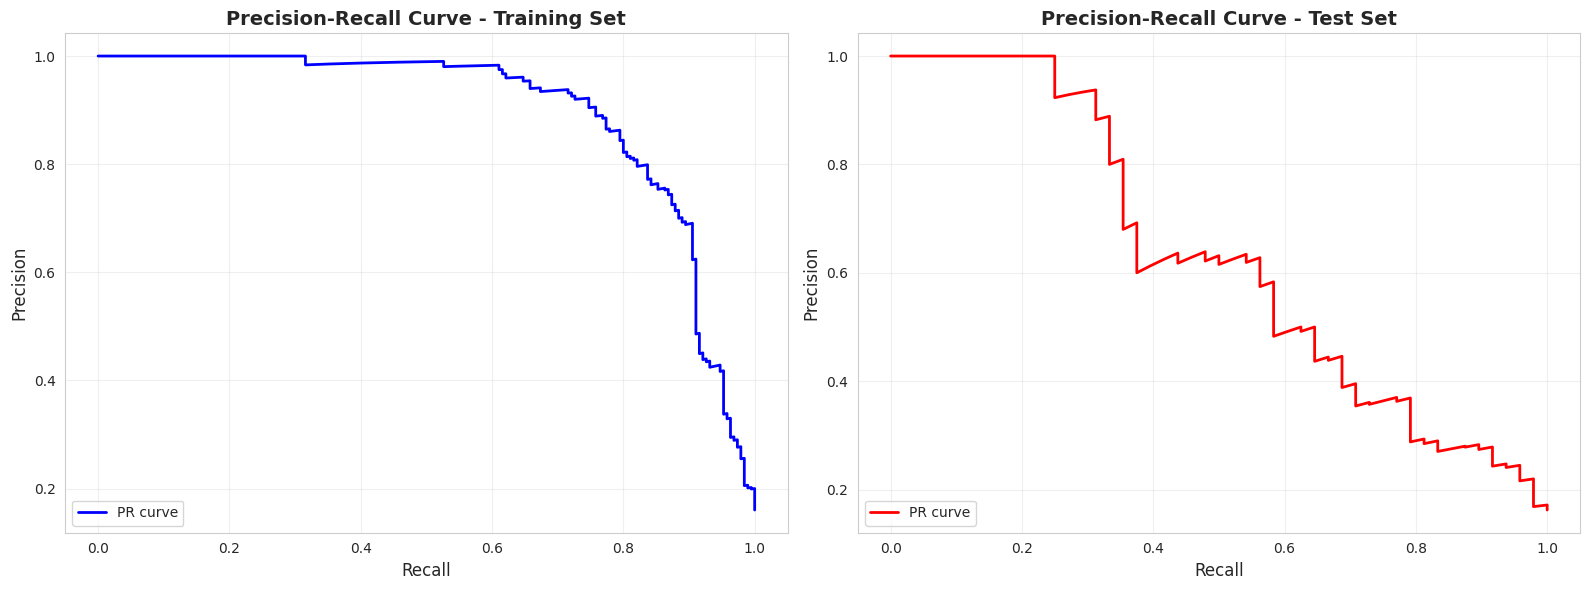

In [20]:
# Precision-Recall Curve
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training Precision-Recall curve
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_proba)
axes[0].plot(recall_train, precision_train, color='blue', lw=2, label='PR curve')
axes[0].set_xlabel('Recall', fontsize=12)
axes[0].set_ylabel('Precision', fontsize=12)
axes[0].set_title('Precision-Recall Curve - Training Set', fontsize=14, fontweight='bold')
axes[0].legend(loc="lower left")
axes[0].grid(True, alpha=0.3)

# Test Precision-Recall curve
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_proba)
axes[1].plot(recall_test, precision_test, color='red', lw=2, label='PR curve')
axes[1].set_xlabel('Recall', fontsize=12)
axes[1].set_ylabel('Precision', fontsize=12)
axes[1].set_title('Precision-Recall Curve - Test Set', fontsize=14, fontweight='bold')
axes[1].legend(loc="lower left")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


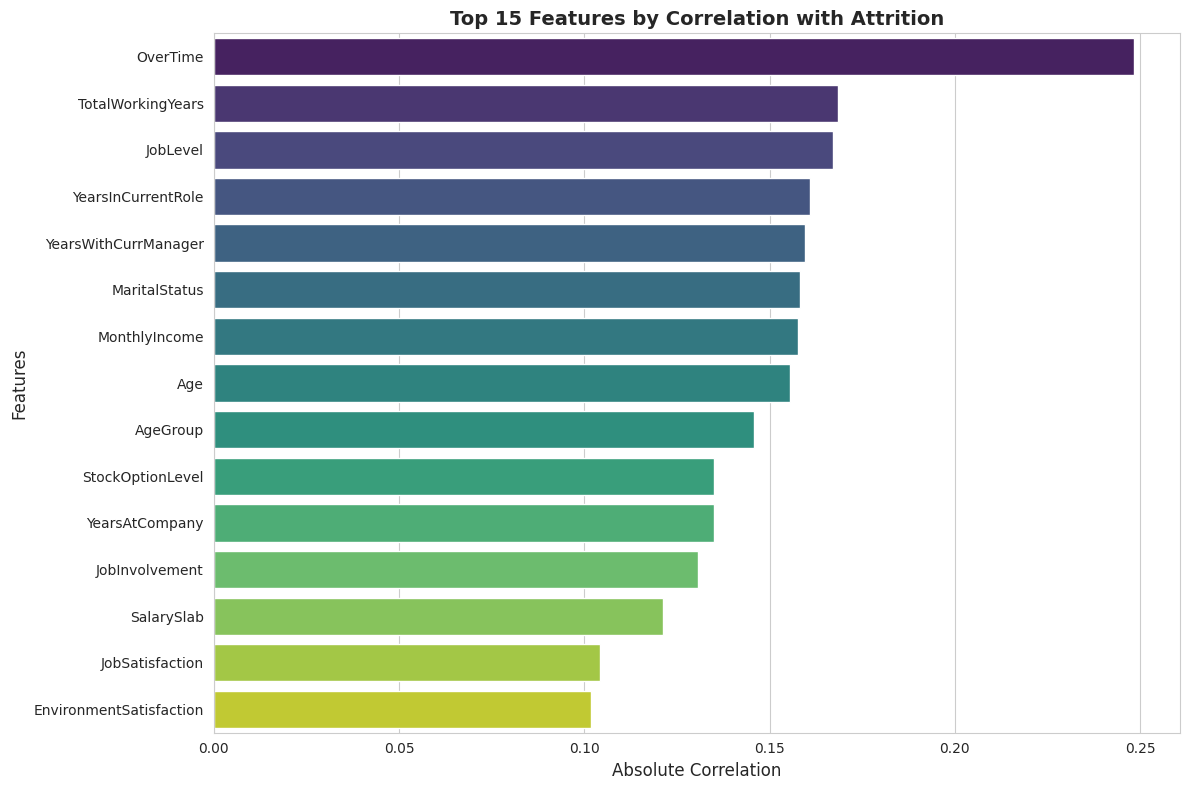


Top 10 Most Important Features:
                 feature  importance
20              OverTime    0.248331
25     TotalWorkingYears    0.168358
12              JobLevel    0.167150
29    YearsInCurrentRole    0.160968
31  YearsWithCurrManager    0.159527
15         MaritalStatus    0.158124
16         MonthlyIncome    0.157672
0                    Age    0.155476
1               AgeGroup    0.145693
24      StockOptionLevel    0.135140


In [21]:
# Feature Importance (based on correlation with target)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': attrition_corr[X.columns].values
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, y='feature', x='importance', palette='viridis')
plt.title('Top 15 Features by Correlation with Attrition', fontsize=14, fontweight='bold')
plt.xlabel('Absolute Correlation', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


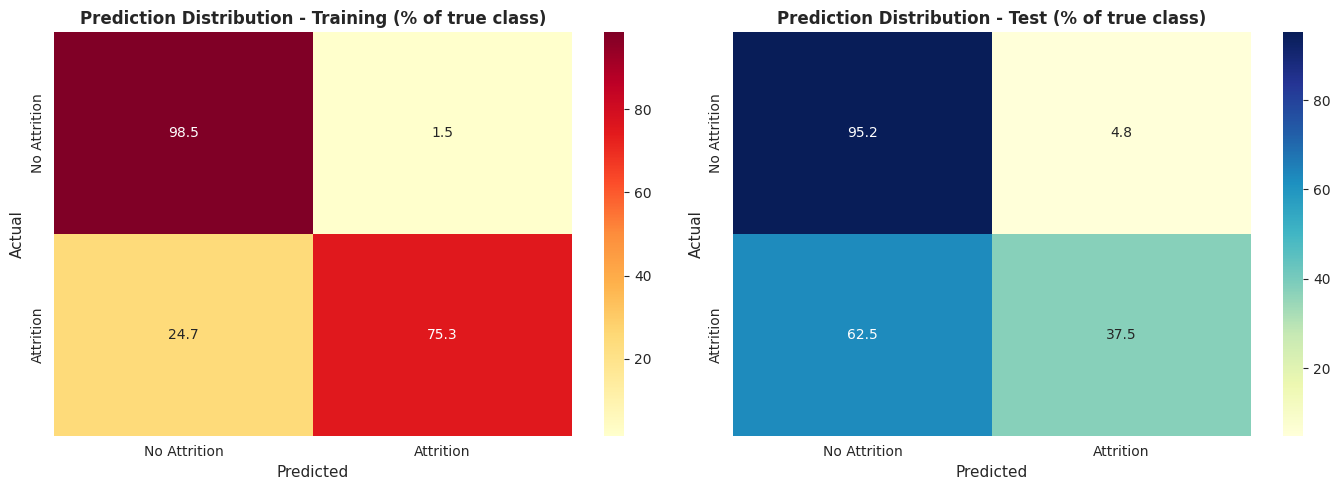

In [22]:
# Prediction distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training predictions distribution
train_pred_df = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_train_pred
})
train_confusion_pct = pd.crosstab(train_pred_df['Actual'], train_pred_df['Predicted'], 
                                   normalize='index') * 100
sns.heatmap(train_confusion_pct, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[0],
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
axes[0].set_title('Prediction Distribution - Training (% of true class)', 
                  fontsize=12, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=11)
axes[0].set_xlabel('Predicted', fontsize=11)

# Test predictions distribution
test_pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})
test_confusion_pct = pd.crosstab(test_pred_df['Actual'], test_pred_df['Predicted'], 
                                  normalize='index') * 100
sns.heatmap(test_confusion_pct, annot=True, fmt='.1f', cmap='YlGnBu', ax=axes[1],
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
axes[1].set_title('Prediction Distribution - Test (% of true class)', 
                  fontsize=12, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=11)
axes[1].set_xlabel('Predicted', fontsize=11)

plt.tight_layout()
plt.show()


## 6. SHAP Analysis - Model Interpretability


In [23]:
# Initialize SHAP explainer
# For neural networks, we'll use KernelExplainer or Explainer
# Using a sample of training data for background (SHAP needs reference data)
print("Initializing SHAP explainer...")
print("="*50)

# Sample background data for faster computation (SHAP can be slow on full dataset)
background_size = min(100, len(X_train_scaled))
background_data = X_train_scaled[:background_size]

# Create SHAP explainer
# Using Explainer which automatically selects the best explainer for the model
explainer = shap.Explainer(mlp.predict_proba, background_data)
print(f"✓ SHAP explainer created with background data size: {background_size}")
print(f"✓ Background data shape: {background_data.shape}")


Initializing SHAP explainer...
✓ SHAP explainer created with background data size: 100
✓ Background data shape: (100, 32)


In [ ]:
# Calculate SHAP values for test set
# Using a sample of test data for visualization (SHAP can be computationally expensive)
sample_size = min(100, len(X_test_scaled))
test_sample_indices = np.random.choice(len(X_test_scaled), sample_size, replace=False)
X_test_sample = X_test_scaled[test_sample_indices]

print(f"Calculating SHAP values for {sample_size} test samples...")
print("This may take a few minutes...")
print("="*50)

# Calculate SHAP values
shap_values = explainer(X_test_sample)

print("✓ SHAP values calculated successfully!")
print(f"✓ SHAP values type: {type(shap_values)}")

# Handle different SHAP output formats
if isinstance(shap_values, list):
    # If it's a list (one Explanation per class), convert to array
    print(f"✓ SHAP values is a list with {len(shap_values)} elements")
    shap_values_array = np.array([sv.values if hasattr(sv, 'values') else sv for sv in shap_values])
    # Reshape to (n_samples, n_features, n_classes)
    shap_values_array = np.transpose(shap_values_array, (1, 2, 0))
    shap_values = shap_values_array
elif hasattr(shap_values, 'values'):
    # If it's a SHAP Explanation object
    shap_values = shap_values.values
elif isinstance(shap_values, np.ndarray):
    # Already an array
    pass
else:
    # Try to convert to array
    shap_values = np.array(shap_values)

print(f"✓ SHAP values shape: {shap_values.shape}")
if len(shap_values.shape) >= 1:
    print(f"✓ Number of samples: {shap_values.shape[0]}")
if len(shap_values.shape) >= 2:
    print(f"✓ Number of features: {shap_values.shape[1]}")
if len(shap_values.shape) >= 3:
    print(f"✓ Number of classes: {shap_values.shape[2]}")


Calculating SHAP values for 100 test samples...
This may take a few minutes...
✓ SHAP values calculated successfully!
✓ SHAP values shape: (100, 32, 2)
✓ Number of samples: 100
✓ Number of features: 32
✓ Number of classes: 2


Generating SHAP Summary Plot...


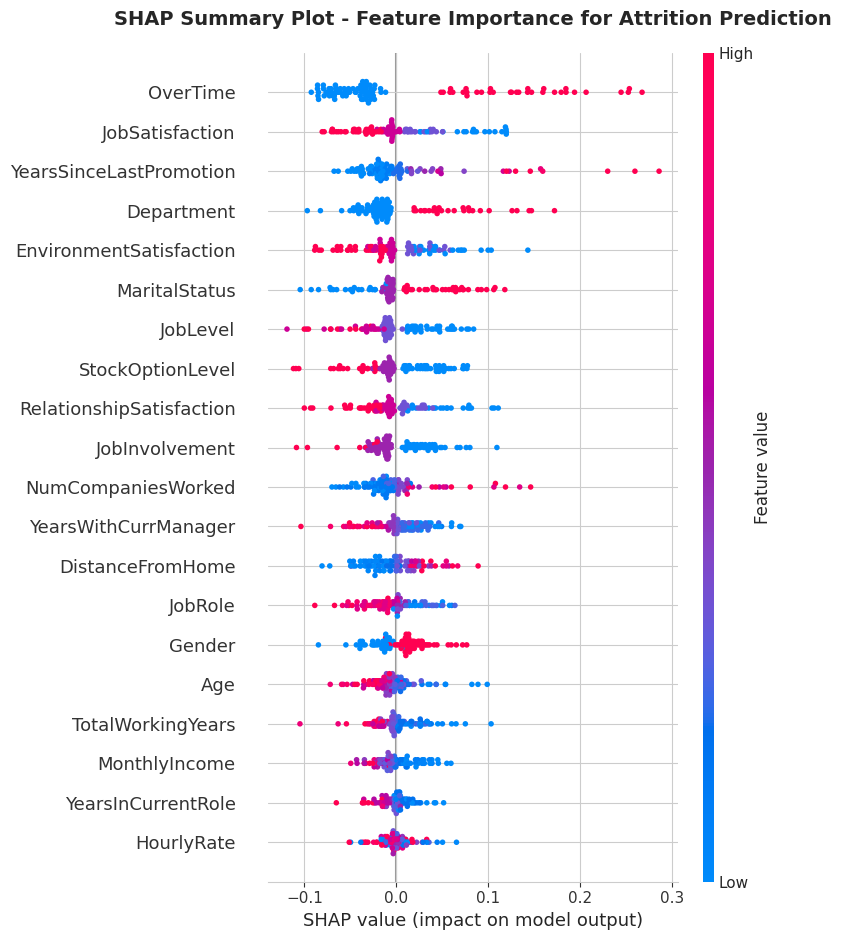

✓ Summary plot generated!


In [ ]:
# SHAP Summary Plot - Overall Feature Importance
# Using SHAP values for the positive class (Attrition = 1)
print("Extracting SHAP values for Attrition class...")
print(f"Debug: shap_values type: {type(shap_values)}")
print(f"Debug: shap_values shape: {shap_values.shape if hasattr(shap_values, 'shape') else 'N/A'}")

# Handle different SHAP value formats
if hasattr(shap_values, 'values'):
    # If it's a SHAP Explanation object, extract values
    shap_values_array = shap_values.values
elif isinstance(shap_values, np.ndarray):
    shap_values_array = shap_values
else:
    shap_values_array = np.array(shap_values)

print(f"Debug: shap_values_array shape: {shap_values_array.shape}")

# Extract SHAP values for class 1 (Attrition)
# Shape should be (n_samples, n_features, n_classes) for multi-class
if len(shap_values_array.shape) == 3:
    shap_values_attrition = shap_values_array[:, :, 1]  # Extract SHAP values for class 1
elif len(shap_values_array.shape) == 2:
    # If 2D, assume it's already for one class
    shap_values_attrition = shap_values_array
else:
    raise ValueError(f"Unexpected SHAP values shape: {shap_values_array.shape}")

print(f"Debug: shap_values_attrition shape: {shap_values_attrition.shape}")
print("Generating SHAP Summary Plot...")
print("="*50)

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_attrition, X_test_sample, 
                  feature_names=X.columns.tolist(), 
                  show=False, max_display=20)
plt.title('SHAP Summary Plot - Feature Importance for Attrition Prediction', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✓ Summary plot generated!")


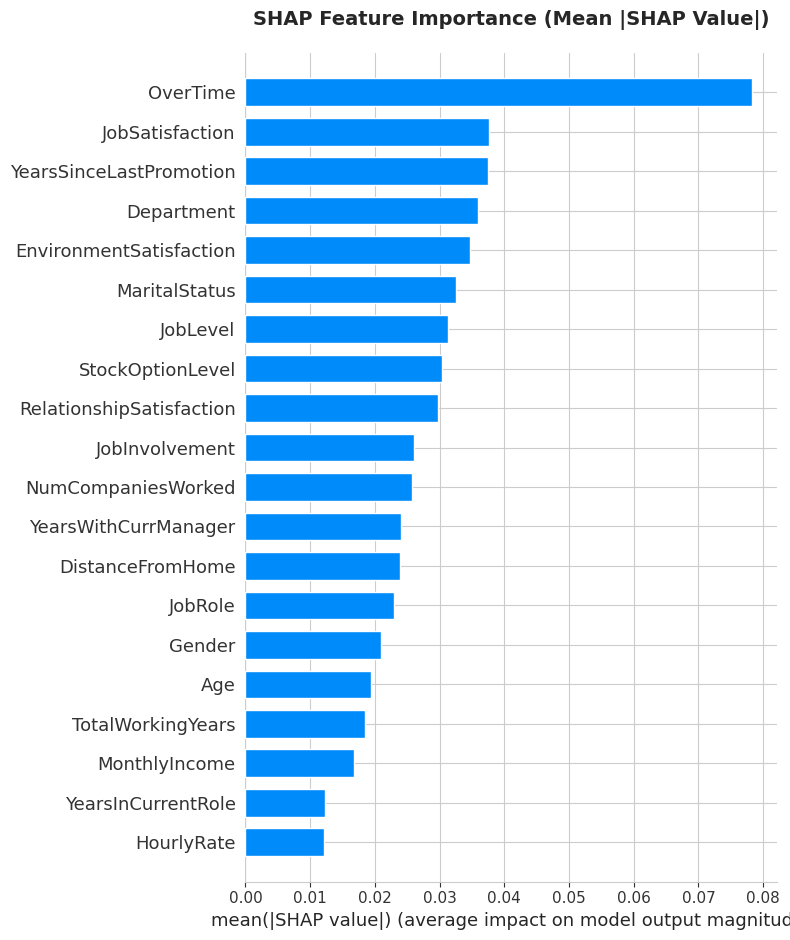

✓ Bar plot generated!


In [26]:
# SHAP Summary Plot - Bar Plot (Mean Absolute SHAP Values)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_attrition, X_test_sample, 
                  feature_names=X.columns.tolist(), 
                  plot_type="bar", show=False, max_display=20)
plt.title('SHAP Feature Importance (Mean |SHAP Value|)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✓ Bar plot generated!")


Debug: shap_values_attrition shape: (100, 32)
Debug: Number of features in X: 32
Debug: Feature names count: 32
Debug: mean_shap_values shape: (32,)
Debug: mean_shap_values length: 32

Top 15 Features by Mean Absolute SHAP Value:
                 feature  mean_abs_shap
                OverTime       0.078204
         JobSatisfaction       0.037629
 YearsSinceLastPromotion       0.037544
              Department       0.035965
 EnvironmentSatisfaction       0.034674
           MaritalStatus       0.032498
                JobLevel       0.031233
        StockOptionLevel       0.030401
RelationshipSatisfaction       0.029679
          JobInvolvement       0.026060
      NumCompaniesWorked       0.025754
    YearsWithCurrManager       0.024028
        DistanceFromHome       0.023810
                 JobRole       0.022907
                  Gender       0.020975



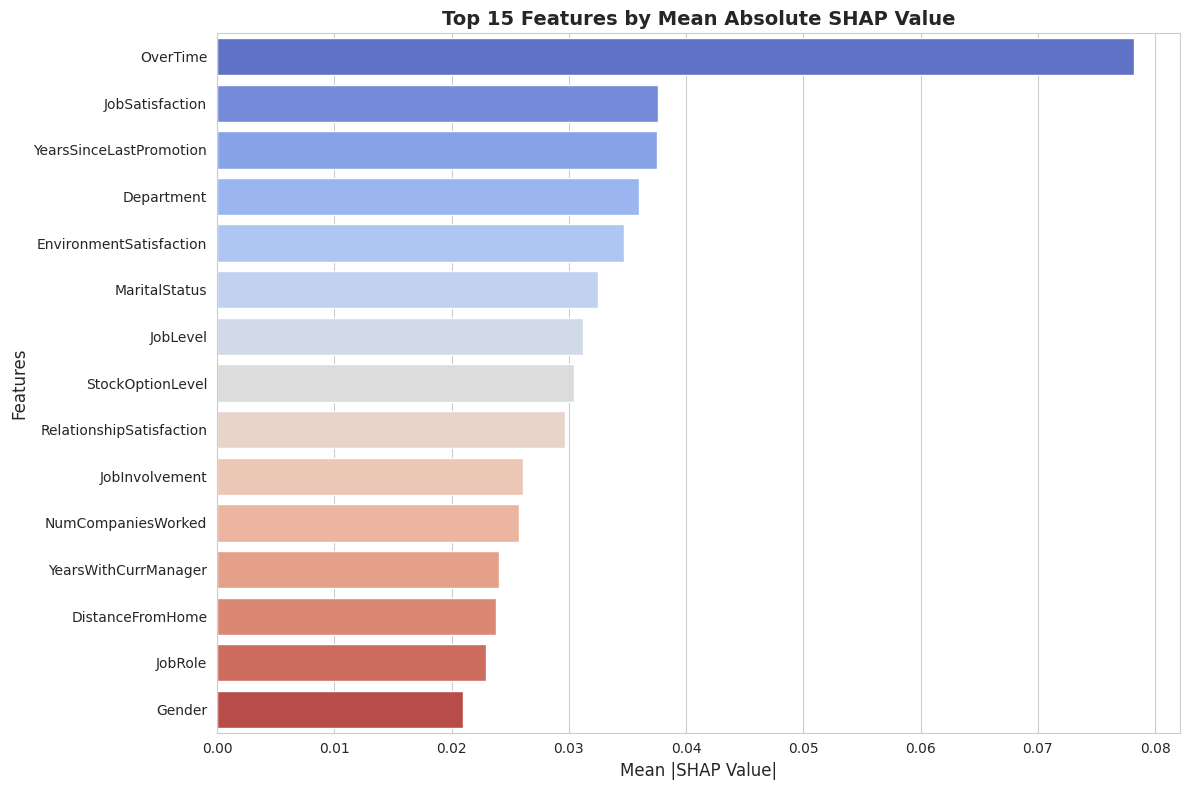

In [28]:
# Calculate mean absolute SHAP values for feature importance ranking
# Debug: Check shapes
print(f"Debug: shap_values_attrition shape: {shap_values_attrition.shape}")
print(f"Debug: Number of features in X: {len(X.columns)}")
print(f"Debug: Feature names count: {len(X.columns.tolist())}")

# Ensure shap_values_attrition is a numpy array and has the right shape
if hasattr(shap_values_attrition, 'values'):
    shap_values_attrition = shap_values_attrition.values

# Calculate mean absolute SHAP values
mean_shap_values = np.abs(shap_values_attrition).mean(axis=0)

# Ensure mean_shap_values is 1D and has the right length
if mean_shap_values.ndim > 1:
    mean_shap_values = mean_shap_values.flatten()

print(f"Debug: mean_shap_values shape: {mean_shap_values.shape}")
print(f"Debug: mean_shap_values length: {len(mean_shap_values)}")

# Ensure lengths match
feature_names = X.columns.tolist()
if len(mean_shap_values) != len(feature_names):
    print(f"Warning: Length mismatch! Trimming to match feature count.")
    min_len = min(len(mean_shap_values), len(feature_names))
    mean_shap_values = mean_shap_values[:min_len]
    feature_names = feature_names[:min_len]

feature_importance_shap = pd.DataFrame({
    'feature': feature_names,
    'mean_abs_shap': mean_shap_values
}).sort_values('mean_abs_shap', ascending=False)

print("\nTop 15 Features by Mean Absolute SHAP Value:")
print("="*60)
print(feature_importance_shap.head(15).to_string(index=False))
print("\n" + "="*60)

# Visualize top features
plt.figure(figsize=(12, 8))
top_shap_features = feature_importance_shap.head(15)
sns.barplot(data=top_shap_features, y='feature', x='mean_abs_shap', palette='coolwarm')
plt.title('Top 15 Features by Mean Absolute SHAP Value', fontsize=14, fontweight='bold')
plt.xlabel('Mean |SHAP Value|', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


Generating SHAP Waterfall Plots for sample predictions...

Example 1: Predicted as Attrition (Index 0)


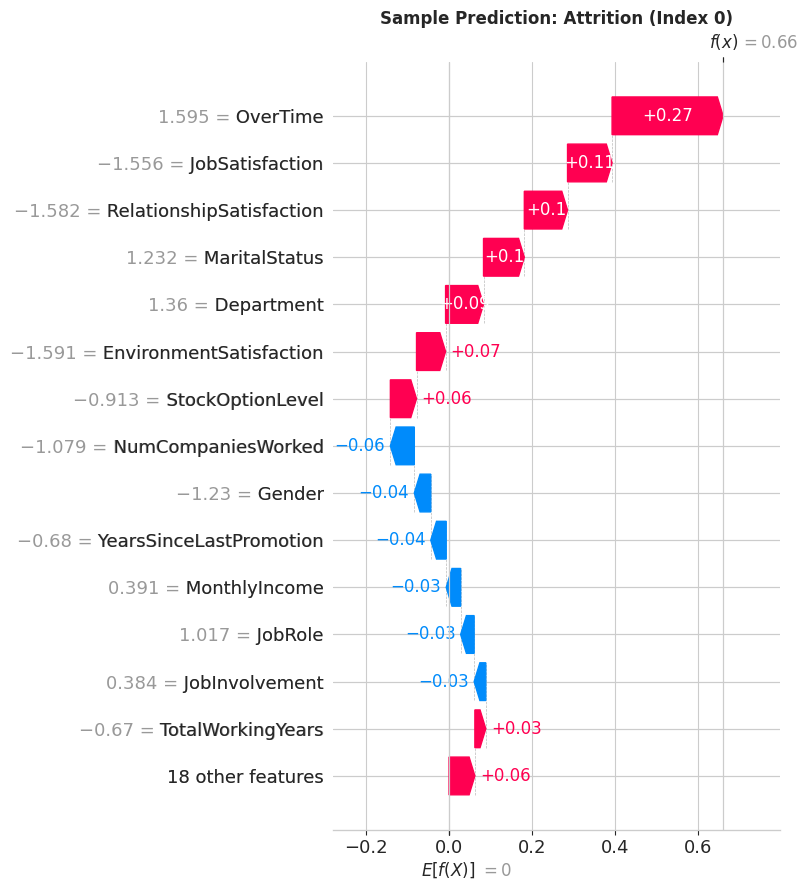


Example 2: Predicted as No Attrition (Index 1)


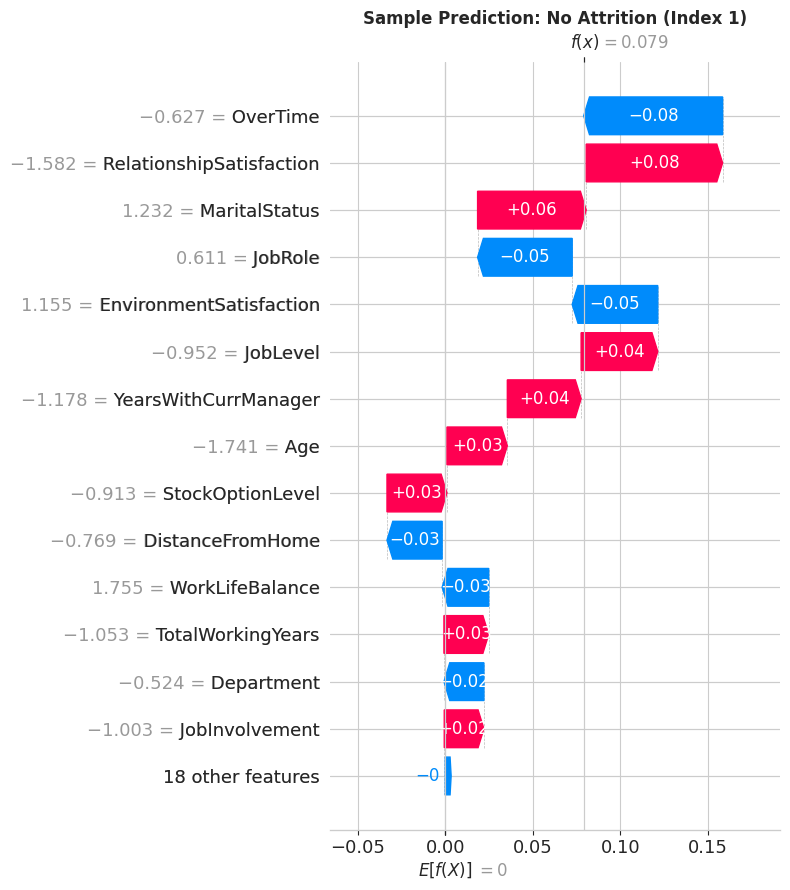


✓ Waterfall plots generated!


In [29]:
# SHAP Waterfall Plot for Individual Predictions
# Show examples for both predicted classes
print("Generating SHAP Waterfall Plots for sample predictions...")
print("="*50)

# Find examples: one predicted as Attrition, one as No Attrition
y_test_sample_pred = mlp.predict(X_test_sample)
attrition_indices = np.where(y_test_sample_pred == 1)[0]
no_attrition_indices = np.where(y_test_sample_pred == 0)[0]

# Create SHAP Explanation objects for waterfall plots
if len(attrition_indices) > 0:
    # Example 1: Predicted as Attrition
    idx1 = attrition_indices[0]
    print(f"\nExample 1: Predicted as Attrition (Index {idx1})")
    shap_explanation_1 = shap.Explanation(
        values=shap_values_attrition[idx1, :],
        base_values=shap_values_attrition.mean() if hasattr(explainer, 'expected_value') else 0,
        data=X_test_sample[idx1, :],
        feature_names=X.columns.tolist()
    )
    shap.waterfall_plot(shap_explanation_1, max_display=15, show=False)
    plt.title(f'Sample Prediction: Attrition (Index {idx1})', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

if len(no_attrition_indices) > 0:
    # Example 2: Predicted as No Attrition
    idx2 = no_attrition_indices[0]
    print(f"\nExample 2: Predicted as No Attrition (Index {idx2})")
    shap_explanation_2 = shap.Explanation(
        values=shap_values_attrition[idx2, :],
        base_values=shap_values_attrition.mean() if hasattr(explainer, 'expected_value') else 0,
        data=X_test_sample[idx2, :],
        feature_names=X.columns.tolist()
    )
    shap.waterfall_plot(shap_explanation_2, max_display=15, show=False)
    plt.title(f'Sample Prediction: No Attrition (Index {idx2})', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("\n✓ Waterfall plots generated!")


Generating SHAP Force Plots...

Generating force plots for 2 examples...

Example 0:
  Actual: Attrition
  Predicted: Attrition
  Probability: 0.820


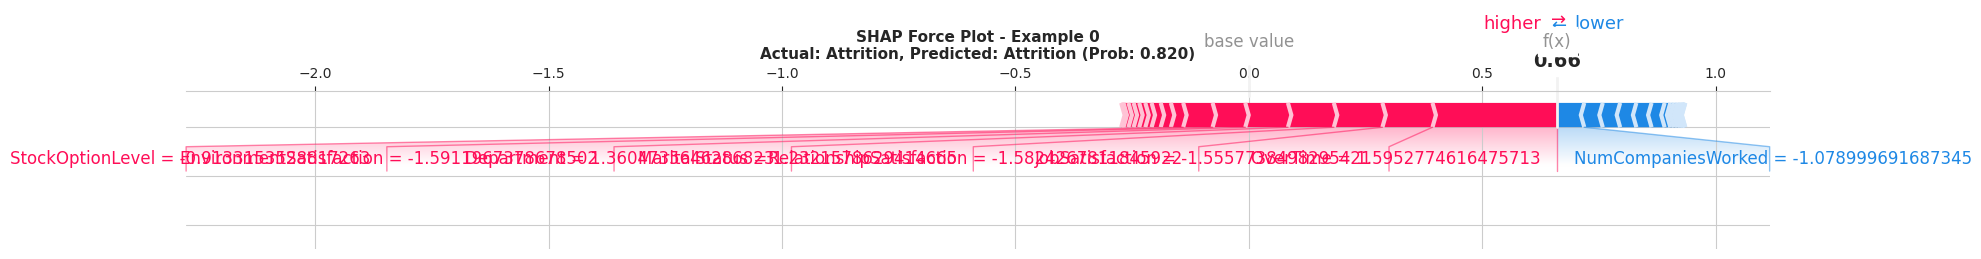


Example 1:
  Actual: No Attrition
  Predicted: No Attrition
  Probability: 0.239


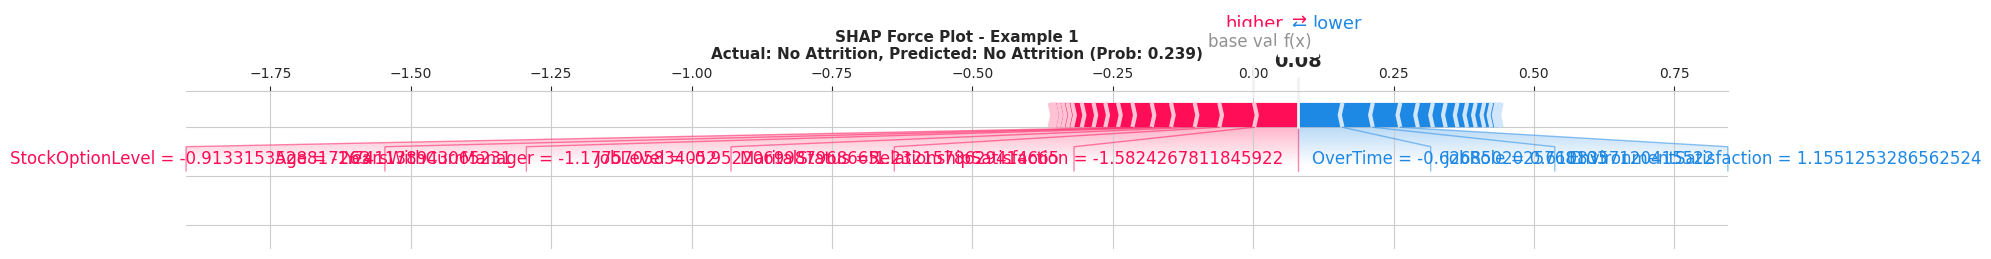


✓ Force plots generated!


In [31]:
# SHAP Force Plot for Individual Predictions
# Create interactive force plots (HTML output)
print("Generating SHAP Force Plots...")
print("="*50)

# Select a few interesting examples
example_indices = []
if len(attrition_indices) > 0:
    example_indices.append(attrition_indices[0])
if len(no_attrition_indices) > 0:
    example_indices.append(no_attrition_indices[0])
if len(example_indices) < 2 and len(X_test_sample) > 2:
    example_indices.append(0)

print(f"\nGenerating force plots for {len(example_indices)} examples...")
for idx in example_indices[:3]:  # Limit to 3 examples
    actual_label = y_test.iloc[test_sample_indices[idx]]
    predicted_label = y_test_sample_pred[idx]
    predicted_proba = mlp.predict_proba(X_test_sample[idx:idx+1])[0, 1]
    
    print(f"\nExample {idx}:")
    print(f"  Actual: {'Attrition' if actual_label == 1 else 'No Attrition'}")
    print(f"  Predicted: {'Attrition' if predicted_label == 1 else 'No Attrition'}")
    print(f"  Probability: {predicted_proba:.3f}")
    
    # Create force plot
    shap.force_plot(
        explainer.expected_value[1] if hasattr(explainer, 'expected_value') else shap_values_attrition.mean(),
        shap_values_attrition[idx, :],
        X_test_sample[idx, :],
        feature_names=X.columns.tolist(),
        matplotlib=True,
        show=False
    )
    plt.title(f'SHAP Force Plot - Example {idx}\n'
              f'Actual: {"Attrition" if actual_label == 1 else "No Attrition"}, '
              f'Predicted: {"Attrition" if predicted_label == 1 else "No Attrition"} '
              f'(Prob: {predicted_proba:.3f})',
              fontsize=11, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("\n✓ Force plots generated!")


In [33]:
# Save SHAP values and feature importance
print("Saving SHAP analysis results...")
print("="*50)

output_dir = './output/shap'

# Save SHAP feature importance
shap_importance_path = os.path.join(output_dir, 'shap_feature_importance.csv')
feature_importance_shap.to_csv(shap_importance_path, index=False)
print(f"✓ SHAP feature importance saved to: {shap_importance_path}")

# Save SHAP values (sample)
shap_values_path = os.path.join(output_dir, 'shap_values_sample.pkl')
shap_data = {
    'shap_values': shap_values_attrition,
    'feature_names': X.columns.tolist(),
    'sample_indices': test_sample_indices,
    'sample_size': sample_size
}
joblib.dump(shap_data, shap_values_path)
print(f"✓ SHAP values saved to: {shap_values_path}")

print("\n" + "="*50)
print("SHAP Analysis Completed!")
print("="*50)
print("\nKey Insights:")
print(f"  • Top 3 most important features (by SHAP):")
for i, row in feature_importance_shap.head(3).iterrows():
    print(f"    {i+1}. {row['feature']}: {row['mean_abs_shap']:.4f}")
print(f"\n  • SHAP values calculated for {sample_size} test samples")
print(f"  • All SHAP results saved to: {output_dir}/")


Saving SHAP analysis results...
✓ SHAP feature importance saved to: ./output/shap/shap_feature_importance.csv
✓ SHAP values saved to: ./output/shap/shap_values_sample.pkl

SHAP Analysis Completed!

Key Insights:
  • Top 3 most important features (by SHAP):
    21. OverTime: 0.0782
    15. JobSatisfaction: 0.0376
    31. YearsSinceLastPromotion: 0.0375

  • SHAP values calculated for 100 test samples
  • All SHAP results saved to: ./output/shap/


## 7. Save Model and Artifacts


In [ ]:
# Create output directory if it doesn't exist
output_dir = './output'
os.makedirs(output_dir, exist_ok=True)

print(f"Output directory created: {output_dir}")
print("Saving model and artifacts...")


Output directory created: ./output
Saving model and artifacts...


In [ ]:
# Save the trained MLP model
model_path = os.path.join(output_dir, 'mlp_attrition_model.pkl')
joblib.dump(mlp, model_path)
print(f"✓ Model saved to: {model_path}")

# Save the scaler
scaler_path = os.path.join(output_dir, 'scaler.pkl')
joblib.dump(scaler, scaler_path)
print(f"✓ Scaler saved to: {scaler_path}")

# Save the imputer
imputer_path = os.path.join(output_dir, 'imputer.pkl')
joblib.dump(imputer, imputer_path)
print(f"✓ Imputer saved to: {imputer_path}")

# Save label encoders
encoders_path = os.path.join(output_dir, 'label_encoders.pkl')
joblib.dump(label_encoders, encoders_path)
print(f"✓ Label encoders saved to: {encoders_path}")

# Save feature names
feature_names_path = os.path.join(output_dir, 'feature_names.pkl')
joblib.dump(X.columns.tolist(), feature_names_path)
print(f"✓ Feature names saved to: {feature_names_path}")


✓ Model saved to: ./output/mlp_attrition_model.pkl
✓ Scaler saved to: ./output/scaler.pkl
✓ Imputer saved to: ./output/imputer.pkl
✓ Label encoders saved to: ./output/label_encoders.pkl
✓ Feature names saved to: ./output/feature_names.pkl


In [ ]:
# Save model performance metrics
metrics = {
    'train_accuracy': train_accuracy,
    'test_accuracy': test_accuracy,
    'train_f1_score': train_f1,
    'test_f1_score': test_f1,
    'train_auc_roc': roc_auc_train,
    'test_auc_roc': roc_auc_test,
    'model_architecture': mlp.hidden_layer_sizes,
    'n_iterations': mlp.n_iter_,
    'final_loss': mlp.loss_
}

metrics_path = os.path.join(output_dir, 'model_metrics.pkl')
joblib.dump(metrics, metrics_path)
print(f"✓ Model metrics saved to: {metrics_path}")

# Save metrics as readable text file
metrics_txt_path = os.path.join(output_dir, 'model_metrics.txt')
with open(metrics_txt_path, 'w') as f:
    f.write("="*60 + "\n")
    f.write("MLP MODEL PERFORMANCE METRICS\n")
    f.write("="*60 + "\n\n")
    f.write(f"Training Accuracy:     {train_accuracy:.4f}\n")
    f.write(f"Test Accuracy:         {test_accuracy:.4f}\n")
    f.write(f"Training F1-Score:     {train_f1:.4f}\n")
    f.write(f"Test F1-Score:         {test_f1:.4f}\n")
    f.write(f"Training AUC-ROC:      {roc_auc_train:.4f}\n")
    f.write(f"Test AUC-ROC:          {roc_auc_test:.4f}\n\n")
    f.write("="*60 + "\n")
    f.write("MODEL CONFIGURATION\n")
    f.write("="*60 + "\n\n")
    f.write(f"Hidden Layer Sizes:    {mlp.hidden_layer_sizes}\n")
    f.write(f"Activation Function:   {mlp.activation}\n")
    f.write(f"Solver:                {mlp.solver}\n")
    f.write(f"Learning Rate:         {mlp.learning_rate}\n")
    f.write(f"Number of Iterations:  {mlp.n_iter_}\n")
    f.write(f"Final Loss:            {mlp.loss_:.6f}\n")
    
print(f"✓ Model metrics (text) saved to: {metrics_txt_path}")


✓ Model metrics saved to: ./output/model_metrics.pkl
✓ Model metrics (text) saved to: ./output/model_metrics.txt


In [ ]:
# Summary
print("\n" + "="*60)
print("MODEL TRAINING AND EVALUATION COMPLETED!")
print("="*60)
print(f"\n📊 Dataset: {df.shape[0]} samples, {df.shape[1]} original features")
print(f"📊 Processed features: {X.shape[1]}")
print(f"📊 Train/Test split: {X_train.shape[0]}/{X_test.shape[0]}")
print(f"\n🧠 MLP Architecture: {mlp.hidden_layer_sizes}")
print(f"🧠 Training iterations: {mlp.n_iter_}")
print(f"🧠 Final loss: {mlp.loss_:.6f}")
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Test F1-Score: {test_f1:.4f}")
print(f"✅ Test AUC-ROC: {roc_auc_test:.4f}")
print(f"\n💾 All artifacts saved to: {output_dir}/")
print("\nFiles saved:")
print("  - mlp_attrition_model.pkl")
print("  - scaler.pkl")
print("  - imputer.pkl")
print("  - label_encoders.pkl")
print("  - feature_names.pkl")
print("  - model_metrics.pkl")
print("  - model_metrics.txt")
print("\n" + "="*60)



MODEL TRAINING AND EVALUATION COMPLETED!

📊 Dataset: 1480 samples, 38 original features
📊 Processed features: 32
📊 Train/Test split: 1184/296

🧠 MLP Architecture: (100, 50, 25)
🧠 Training iterations: 35
🧠 Final loss: 0.061814

✅ Test Accuracy: 0.8581
✅ Test F1-Score: 0.4615
✅ Test AUC-ROC: 0.8366

💾 All artifacts saved to: ./output/

Files saved:
  - mlp_attrition_model.pkl
  - scaler.pkl
  - imputer.pkl
  - label_encoders.pkl
  - feature_names.pkl
  - model_metrics.pkl
  - model_metrics.txt

